In [1]:
from keras.datasets import imdb
from keras import layers
from keras import losses
from keras import metrics
from keras import models
from keras import optimizers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [3]:
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [4]:
def vectorize_sequences(sequences, dimension=10000):
    """
    One-hot encode lists to turn them into vectors of 0s and 1s.
    Done manually for maximum clarity.
    """
    result = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        result[i, sequence] = 1.
    return result

In [5]:
x_train = vectorize_sequences(train_data)
y_train = np.asarray(train_labels).astype('float32')

x_val = x_train[:10000]
y_val = y_train[:10000]

partial_x_train = x_train[10000:]
partial_y_train = y_train[10000:]

x_test = vectorize_sequences(test_data)
y_test = np.asarray(test_labels).astype('float32')

In [6]:
print(f'x_train: {x_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'x_val: {x_val.shape}')
print(f'y_val: {y_val.shape}')
print(f'partial_x_train: {partial_x_train.shape}')
print(f'partial_y_train: {partial_y_train.shape}')
print(f'x_test: {x_test.shape}')
print(f'y_test: {y_test.shape}')

x_train: (25000, 10000)
y_train: (25000,)
x_val: (10000, 10000)
y_val: (10000,)
partial_x_train: (15000, 10000)
partial_y_train: (15000,)
x_test: (25000, 10000)
y_test: (25000,)


In [7]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
model.compile(
    loss=losses.binary_crossentropy,
    metrics=[metrics.binary_accuracy],
    optimizer=optimizers.RMSprop(lr=0.001),
)

In [9]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    batch_size=512,
    epochs=20,
    validation_data=(x_val, y_val),
)

Epoch 1/20
30/30 [==============================] - 1s 28ms/step - loss: 0.5138 - binary_accuracy: 0.7977 - val_loss: 0.4114 - val_binary_accuracy: 0.8373
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3116 - binary_accuracy: 0.9023 - val_loss: 0.3062 - val_binary_accuracy: 0.8877
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2282 - binary_accuracy: 0.9262 - val_loss: 0.2825 - val_binary_accuracy: 0.8895
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1776 - binary_accuracy: 0.9423 - val_loss: 0.3062 - val_binary_accuracy: 0.8784
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1451 - binary_accuracy: 0.9543 - val_loss: 0.2832 - val_binary_accuracy: 0.8877
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1168 - binary_accuracy: 0.9651 - val_loss: 0.2947 - val_binary_accuracy: 0.8881
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - los

In [10]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

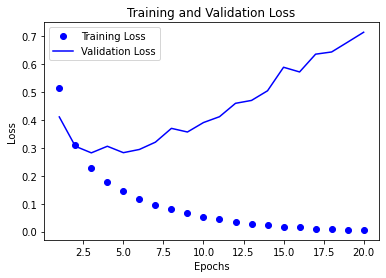

In [11]:
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

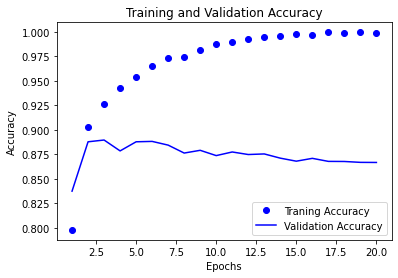

In [12]:
train_accuracy = history_dict['binary_accuracy']
val_accuracy = history_dict['val_binary_accuracy']
plt.plot(epochs, train_accuracy, 'bo', label='Traning Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 706us/step - loss: 0.7848 - binary_accuracy: 0.8507


[0.7848289608955383, 0.8506799936294556]

In [14]:
model.predict(x_test)

array([[0.00866148],
       [1.        ],
       [0.99551326],
       ...,
       [0.00181666],
       [0.02910918],
       [0.94476914]], dtype=float32)